In [1]:
#!ln -s /Users/adel.schmucklermann/Desktop/FoPra/script/library.py library.py

In [23]:
import pytorch_lightning as pl
import h5py
import os
import torch
import csv
import re
import numpy as np
from torch import nn
from torch.nn import functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import library as lib
import pandas as pd
from matplotlib.pylab import plt

In [3]:
pl.seed_everything(42, workers=True) 

Global seed set to 42


42

# Data Pre-Processing

In [4]:
#make numpy file with (seq header, embedding)
esm2 = h5py.File("./KLK_esm2.h5", 'r')
list(esm2.keys())
# List all groups
keys = list(esm2.keys())
#print(keys) 
# Get the data
embedding = []
headers = []
for key in keys:
    #data
    emb = esm2[key][:]
    embedding.append(emb)
    #headers
    key = key.replace("isoform=", "isoform_").replace("=", "").replace(":", "_")
    if key == "GZMA_Canis_lupus":
        print("header is now changed")
        key = "GZMA_Canis_lupus_1"
    headers.append(key)

headers = np.array(headers)
embedding = np.array(embedding)

#split train test
headers_first, headers_test, embedding_first, embedding_test = train_test_split(headers, embedding, test_size=0.1, random_state=42)
#split train validation
headers_train, headers_validate, embedding_train, embedding_validate = train_test_split(headers_first, embedding_first, test_size =0.2, random_state=42)
print("total:", headers.shape)
print("training+validation:", headers_first.shape)
print("test:", headers_test.shape)
print("training:", headers_train.shape)
print("validation:", headers_validate.shape)
print(len(headers_train), len(embedding_train))
print(len(headers_validate), len(embedding_validate))

#training_df = pd.DataFrame({'header': headers_train, 'embedding' : embedding_train})
#validate_df = pd.DataFrame({'header': headers_validate, 'embedding' : embedding_validate})

header is now changed
total: (437,)
training+validation: (393,)
test: (44,)
training: (314,)
validation: (79,)
314 314
79 79


# Dataloaders

In [5]:
train_dataset = lib.makedataset(headers_train, embedding_train)
val_dataset = lib.makedataset(headers_validate, embedding_validate)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, drop_last=True)
    

# Training VAE

In [6]:
#if prott5 used: dtype=float16 -> error with .linear()

#encoder_layers, latent_dim, decoder_layers
dim = 2560
a = int(dim * 1/16)
b = int(dim * 1/8)
c = int(dim * 1/2)
encoder_layers = [dim, c, b, a]
latent_dim = a
decoder_layers = [a, b, c, dim]

# Initialize the VAE model
vae = lib.VariationalAutoencoder(encoder_layers, latent_dim, decoder_layers)

#trainer = pl.Trainer(accelerator="auto", max_epochs=500)
trainer = pl.Trainer(accelerator="gpu", devices = 1, max_epochs=200, log_every_n_steps=4, check_val_every_n_epoch=1)

# Train the VAE model
trainer.fit(vae, train_dataloader, val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\alex\anaconda3\envs\FP_Lightning\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 3.7 M 
1 | latent  | Sequential | 26.1 K
2 | fc21    | Linear     | 25.8 K
3 | fc22    | Linear     | 25.8 K
4 | fc3     | Se

Sanity Checking: 0it [00:00, ?it/s]

C:\Users\alex\anaconda3\envs\FP_Lightning\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\alex\anaconda3\envs\FP_Lightning\lib\site-packages\pytorch_lightning\utilities\data.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
C:\Users\alex\anaconda3\envs\FP_Lightning\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument`

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


# Fix Formatting

In [24]:
def find_largest_number(root_dir):
    largest_number = 0
    for subdir, dirs, files in os.walk(root_dir):
        for dir_name in dirs:
            match = re.search(r'\d+', dir_name)
            if match:
                current_number = int(match.group())
                if current_number > largest_number:
                    largest_number = current_number
    return largest_number

largest_num = find_largest_number("./lightning_logs")

#Fix formatting
with open('lightning_logs/version_' + str(largest_num) + '/metrics.csv', 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

combined_rows = []
header_row = ['train_loss','reconstruction_loss','kl_loss','epoch','step','validation_loss']

combined_rows.append(header_row)
for i in range(1, len(rows) -1, 2):
    train_loss = rows[i][0]
    reconstruction_loss = rows[i][1]
    kl_loss = rows[i][2]
    epoch = rows[i+1][3]
    step = rows[i+1][4]
    validation_loss = rows[i+1][5]
    combined_rows.append([train_loss,reconstruction_loss,kl_loss,epoch,step,validation_loss])

with open('lightning_logs/version_' + str(largest_num) + '/new_metrics.csv', 'w', newline = "") as file:
    writer = csv.writer(file)
    writer.writerows(combined_rows)

# Plot Loss

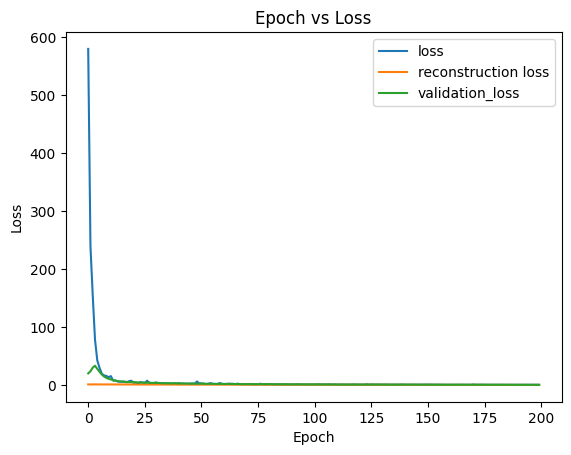

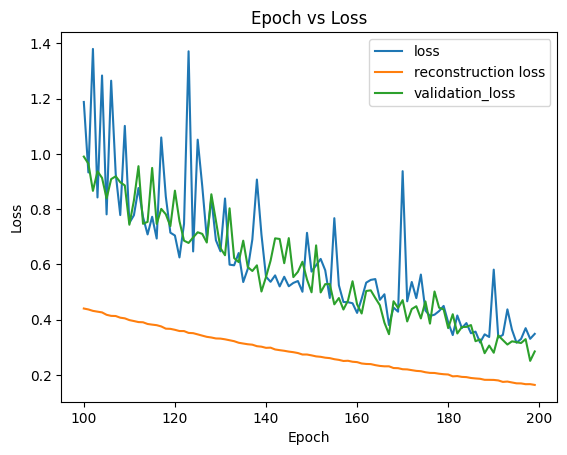

In [15]:
#Plot
# read csv file
df = pd.read_csv('lightning_logs/version_' + str(largest_num) + '/new_metrics.csv')

df1 = df[df['epoch'] >= 100]

# plot 0
plt.plot('epoch', 'train_loss', data=df)
plt.plot('epoch', 'reconstruction_loss', data=df)
plt.plot('epoch', 'validation_loss', data=df)
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'reconstruction loss', 'validation_loss'], loc='upper right')
plt.show()


# plot 1
plt.plot('epoch', 'train_loss', data=df1)
plt.plot('epoch', 'reconstruction_loss', data=df1)
plt.plot('epoch', 'validation_loss', data=df1)
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'reconstruction loss', 'validation_loss'], loc='upper right')
plt.show()

# Encode

In [16]:
encode = vae.encoder(torch.Tensor(embedding))
#mu, logvar = vae.encode(torch.Tensor(embedding))
#en = vae.reparameterize(mu, logvar)
#encode = vae.decode(en)
print(encode)

#encode = encode #[1]


tensor([[-0.1968,  0.3560, -0.1711,  ..., -0.2160, -0.5260,  0.2829],
        [ 0.0321, -0.0580,  0.1664,  ..., -0.0768,  0.1816, -0.0544],
        [ 0.1098,  0.1921, -0.1453,  ...,  0.1326, -0.2151,  0.1044],
        ...,
        [-0.2939,  0.2497, -0.2403,  ..., -0.3059, -0.2979,  0.2524],
        [-0.4906,  0.1651, -0.1880,  ..., -0.2452, -0.2695,  0.1491],
        [ 0.0196, -0.4601,  0.5824,  ...,  0.3462,  0.1463, -0.5569]],
       grad_fn=<NativeBatchNormBackward0>)


# Neighbor_joining and create tree

In [17]:
# Neighbor_joining and create tree

from sklearn.manifold import trustworthiness

#write output flag
writer = False

#epochs
epoch = 100

#cosine, euclidean, manhattan, ts_ss, jensenshannon
metric_list = ["cosine","euclidean", "manhattan", "ts_ss"]

for metric in metric_list:
    out_newick = "/Users/adel.schmucklermann/Desktop/FoPra/KLK/KLK_esm2_nj_encode_"+str(epoch)+"_"+metric+".newick"

    embedding_out = encode.detach() #torch.stack(encode).detach() 
    #print(embedding_out)

    #distance metric
    dist = lib.distance_metric(embedding_out)
    distmat = dist.get_metric(embedding_out, metric) 
    
    #neighbor joining to tree
    nj = lib.neighbor_joining(distmat,headers)
    newick = nj.get_newick(distmat,headers)
    
    #trustworthiness
    _distmat  = lib.cophenetic_distmat(newick, names=headers)
    _trustworthiness = trustworthiness(distmat, _distmat, n_neighbors=10, metric='precomputed')
    print("trustworthiness: ", _trustworthiness)
    
    
    #silhouette = silhouette_score(_distmat, headers, metric='precomputed')
    #silhouette = lib.silhouette.get_silhouette(distmat, headers)
    #print("silhouette: ", silhouette)
    

    if writer:
        with open(out_newick, 'w') as w:
            w.write(newick)
            w.close()

tensor([[-0.1968,  0.3560, -0.1711,  ..., -0.2160, -0.5260,  0.2829],
        [ 0.0321, -0.0580,  0.1664,  ..., -0.0768,  0.1816, -0.0544],
        [ 0.1098,  0.1921, -0.1453,  ...,  0.1326, -0.2151,  0.1044],
        ...,
        [-0.2939,  0.2497, -0.2403,  ..., -0.3059, -0.2979,  0.2524],
        [-0.4906,  0.1651, -0.1880,  ..., -0.2452, -0.2695,  0.1491],
        [ 0.0196, -0.4601,  0.5824,  ...,  0.3462,  0.1463, -0.5569]])


NameError: name 'cophenetic_distmat' is not defined

# UPGMA and create tree

In [ ]:
#write output flag
writer = True
from sklearn.metrics import silhouette_score
from itertools import groupby
import string

#epochs
epoch = 100

#cosine, euclidean, manhattan, ts_ss, jensenshannon
metric_list = ["cosine","euclidean", "manhattan", "ts_ss"]

for metric in metric_list:
    out_newick = "/Users/adel.schmucklermann/Desktop/FoPra/KLK/KLK_esm2_upgma_encode_"+str(epoch)+"_"+metric+".newick"

    embedding_out = encode.detach() #torch.stack(encode).detach() 
    #print(embedding_out)
    
    #distance metric
    dist = lib.distance_metric(embedding_out)
    distmat = dist.get_metric(embedding_out, metric)
    #print(distmat)
    
    #upgma to tree
    upgma = lib.upgma(distmat,headers)
    #newick = upgma.get_newick(distmat,headers)
   
    #trustworthiness
    _distmat  = lib.cophenetic_distmat(upgma, names=headers)
    _trustworthiness = trustworthiness(distmat, _distmat, n_neighbors=10, metric='precomputed')
    print("trustworthiness: ", _trustworthiness)
    
    
    if writer:
        with open(out_newick, 'w') as w:
            w.write(upgma)
            w.close()

# Plot Loss